<a href="https://colab.research.google.com/github/prabur90/machinelearning/blob/main/Linear__Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I. Supervised Learning:
  1. Classification
  2. Regression
  3. Clustering
  4. Dimensionality Reduction
  5. Association Rule Mining
  6. Anomaly Detection
  7. Generative Models
  8. Reinforcement Learning

1. Classification Algorithm:
  a. K-Nearest Neighbors (KNN)
  b. Logistic Regression
  c. Support Vector Machines (SVM)
  d. Decision Trees
  e. Random Forest
  f. Naive Bayes
  g. Neural Networks
  h. Bayesian Networks
  i. Latent Dirichlet Allocation

2. Regression Algorithm:
  a. Linear Regression
  b. Logistic Regression
  c. Support Vector Machines (SVM)
  d. Decision Trees
  e. Random Forest
  f. Naive Bayes
  g. Neural Networks
  h. Bayesian Networks
  i. Latent Dirichlet Allocation

II. Unsupervised Learning:
  1. Clustering Algorithm:
    a. K-Means
    b. Hierarchical Clustering
    c. DBSCAN
    d. Gaussian Mixture Models
    e. Spectral Clustering

    2. Dimensionality Reduction Algorithm:
    a. Principal Component Analysis (PCA)
    b. Linear Discriminant Analysis (LDA)
    c. t-Distributed Stochastic Neighbor Embedding (t-SNE)

    3. Association Rule Mining Algorithm:
    a. Apriori
    b. Eclat

    4. Anomaly Detection Algorithm:
    a. Isolation Forest
    b. Local Outlier Factor (LOF)
    c. One-Class SVM
    d. Autoencoders
    e. Generative Models
    f. Reinforcement Learning
    g. Bayesian Networks
    

Regression Algorithm - Simple Linear Regression

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
!pip install kaggle

In [5]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prabur90","key":"3dc4462a101e67bc5d4f65e8495c49c1"}'}

In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 68.0MB/s]


In [9]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows of the dataframe
print(data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [12]:
# Select the relevant columns
data = data[['GrLivArea', 'SalePrice']]

# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing values
data = data.dropna()
print(data.head())

GrLivArea    0
SalePrice    0
dtype: int64
   GrLivArea  SalePrice
0       1710     208500
1       1262     181500
2       1786     223500
3       1717     140000
4       2198     250000


In [13]:
from sklearn.model_selection import train_test_split

# Define the feature and target variable
X = data[['GrLivArea']]
y = data['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.linear_model import LinearRegression

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 3418946311.180807
R^2 Score: 0.5542632452871117


In [16]:
# Predict the price of a new house
new_house = pd.DataFrame({'GrLivArea': [1500]})  # Example input with a living area of 1500 square feet
predicted_price = model.predict(new_house)

print(f'Predicted Sale Price for the house: ${predicted_price[0]:.2f}')

Predicted Sale Price for the house: $178633.19


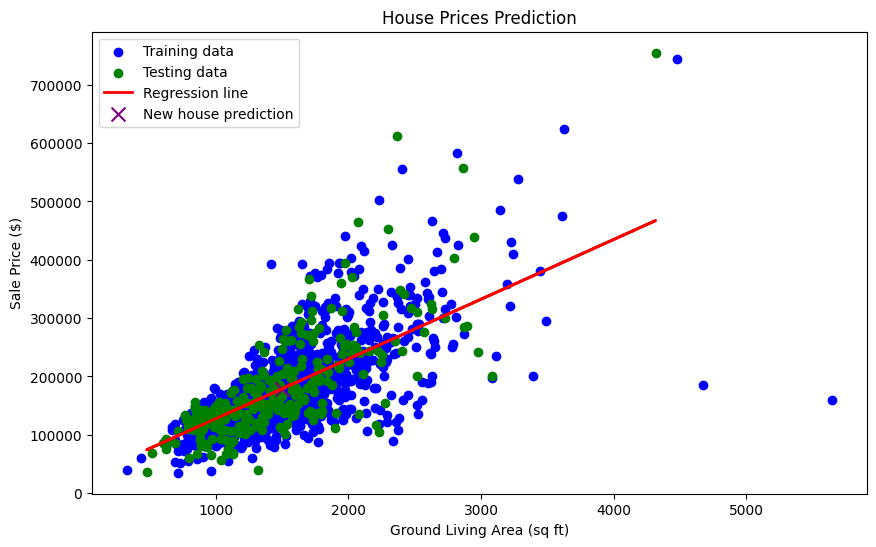

In [17]:
import matplotlib.pyplot as plt


# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')

# Plotting the regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
# Plotting the prediction for the new house
plt.scatter(new_house, predicted_price, color='purple', label='New house prediction', marker='x', s=100)

plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.title('House Prices Prediction')
plt.legend()
plt.show()